In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
path = "C:\study material\CS F266\combined_data_final_for_model_100scen.csv"
df = pd.read_csv(path)

In [3]:
lcols = [f'Leak_node-{i+1}' for i in range(32)]

In [4]:
df.head()

,Timestamp,D_node-1,D_node-2,D_node-3,D_node-4,D_node-5,D_node-6,D_node-7,D_node-8,D_node-9,...,Leak_node-23,Leak_node-24,Leak_node-25,Leak_node-26,Leak_node-27,Leak_node-28,Leak_node-29,Leak_node-30,Leak_node-31,Leak_node-32
0,2017-01-01 00:00:00,-3337.2,151.2,140.4,21.6,104.4,169.2,219.6,86.4,90.0,...,0,0,0,0,0,0,0,0,0,0
1,2017-01-01 00:30:00,-2973.6,136.8,122.4,18.0,100.8,154.8,230.4,79.2,72.0,...,0,0,0,0,0,0,0,0,0,0
2,2017-01-01 01:00:00,-2584.8,118.8,100.8,18.0,82.8,140.4,194.4,64.8,72.0,...,0,0,0,0,0,0,0,0,0,0
3,2017-01-01 01:30:00,-2419.2,108.0,93.6,14.4,75.6,144.0,176.4,57.6,61.2,...,0,0,0,0,0,0,0,0,0,0
4,2017-01-01 02:00:00,-2196.0,100.8,82.8,14.4,72.0,133.2,147.6,54.0,61.2,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = df.drop(columns=['Timestamp', *lcols]).copy()

# Copying only the leak node part 
sf = df[lcols].copy()

In [6]:
X.shape

(1752000, 98)

In [7]:
sf.shape

(1752000, 32)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, sf, test_size=0.2, random_state=42)

In [9]:
X_train_reshaped = tf.convert_to_tensor(np.expand_dims(X_train.values, axis=2), dtype=tf.float32)
X_test_reshaped = tf.convert_to_tensor(np.expand_dims(X_test.values, axis=2), dtype=tf.float32)


In [10]:
X_train

,D_node-1,D_node-2,D_node-3,D_node-4,D_node-5,D_node-6,D_node-7,D_node-8,D_node-9,D_node-10,...,F_node-25,F_node-26,F_node-27,F_node-28,F_node-29,F_node-30,F_node-31,F_node-32,F_node-33,F_node-34
1595606,-5871.6,259.2,248.4,36.0,216.0,284.4,421.2,165.6,158.4,129.6,...,705.6,-320.4,-64.8,50.4,194.4,126.0,10.8,-75.6,104.4,342.0
743483,-3902.4,172.8,194.4,25.2,115.2,194.4,248.4,122.4,115.2,111.6,...,457.2,-230.4,-57.6,3.6,126.0,75.6,18.0,-36.0,54.0,194.4
39049,-6750.0,316.8,306.0,50.4,237.6,298.8,421.2,183.6,172.8,198.0,...,802.8,-342.0,-32.4,93.6,252.0,165.6,50.4,-82.8,111.6,410.4
813614,-4280.4,180.0,183.6,28.8,162.0,241.2,273.6,122.4,108.0,97.2,...,496.8,-205.2,-7.2,72.0,151.2,93.6,18.0,-57.6,82.8,248.4
1720272,-4042.8,183.6,172.8,21.6,154.8,208.8,230.4,115.2,118.8,115.2,...,518.4,-259.2,-50.4,25.2,144.0,90.0,32.4,-39.6,57.6,226.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,-6130.8,255.6,259.2,36.0,219.6,349.2,345.6,176.4,136.8,187.2,...,694.8,-259.2,-28.8,90.0,172.8,90.0,-28.8,-126.0,154.8,378.0
1414414,-4917.6,198.0,212.4,36.0,172.8,223.2,360.0,144.0,122.4,147.6,...,579.6,-266.4,-18.0,72.0,187.2,122.4,32.4,-57.6,82.8,270.0
131932,-8110.8,392.4,381.6,68.4,327.6,327.6,612.0,248.4,162.0,244.8,...,820.8,-370.8,-36.0,140.4,295.2,180.0,39.6,-79.2,115.2,381.6
671155,-7988.4,349.2,324.0,46.8,309.6,385.2,536.4,216.0,201.6,226.8,...,954.0,-406.8,-32.4,104.4,291.6,176.4,32.4,-108.0,151.2,475.2


In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='sigmoid')  # Output layer with 32 nodes, using sigmoid activation
])

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10


35040/35040 [==============================] - 287s 8ms/step - loss: 0.0445 - accuracy: 0.1398 - val_loss: 0.0040 - val_accuracy: 0.1453
Epoch 2/10
35040/35040 [==============================] - 254s 7ms/step - loss: 0.0038 - accuracy: 0.1459 - val_loss: 0.0018 - val_accuracy: 0.1466
Epoch 3/10
35040/35040 [==============================] - 270s 8ms/step - loss: 0.0029 - accuracy: 0.1465 - val_loss: 0.0011 - val_accuracy: 0.1475
Epoch 4/10
35040/35040 [==============================] - 274s 8ms/step - loss: 0.0023 - accuracy: 0.1469 - val_loss: 0.0039 - val_accuracy: 0.1481
Epoch 5/10
35040/35040 [==============================] - 274s 8ms/step - loss: 0.0020 - accuracy: 0.1474 - val_loss: 8.7269e-04 - val_accuracy: 0.1477
Epoch 6/10
35040/35040 [==============================] - 300s 9ms/step - loss: 0.0018 - accuracy: 0.1473 - val_loss: 0.0020 - val_accuracy: 0.1464
Epoch 7/10
35040/35040 [==============================] - 309s 9ms/step - loss: 0.0016 - accuracy: 0.1480 

In [14]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

10950/10950 [==============================] - 45s 4ms/step - loss: 0.0010 - accuracy: 0.1473
Test Loss: 0.0010046819224953651
Test Accuracy: 0.14728310704231262


In [15]:
y_pred = model.predict(X_test_reshaped)

# Convert predictions and true labels to binary
y_pred_binary = np.where(y_pred > 0.5, 1, 0)
y_test_binary = y_test.values

10950/10950 [==============================] - 40s 4ms/step


In [16]:
from sklearn.metrics import multilabel_confusion_matrix

In [17]:
mcm = multilabel_confusion_matrix(y_test_binary, y_pred_binary)



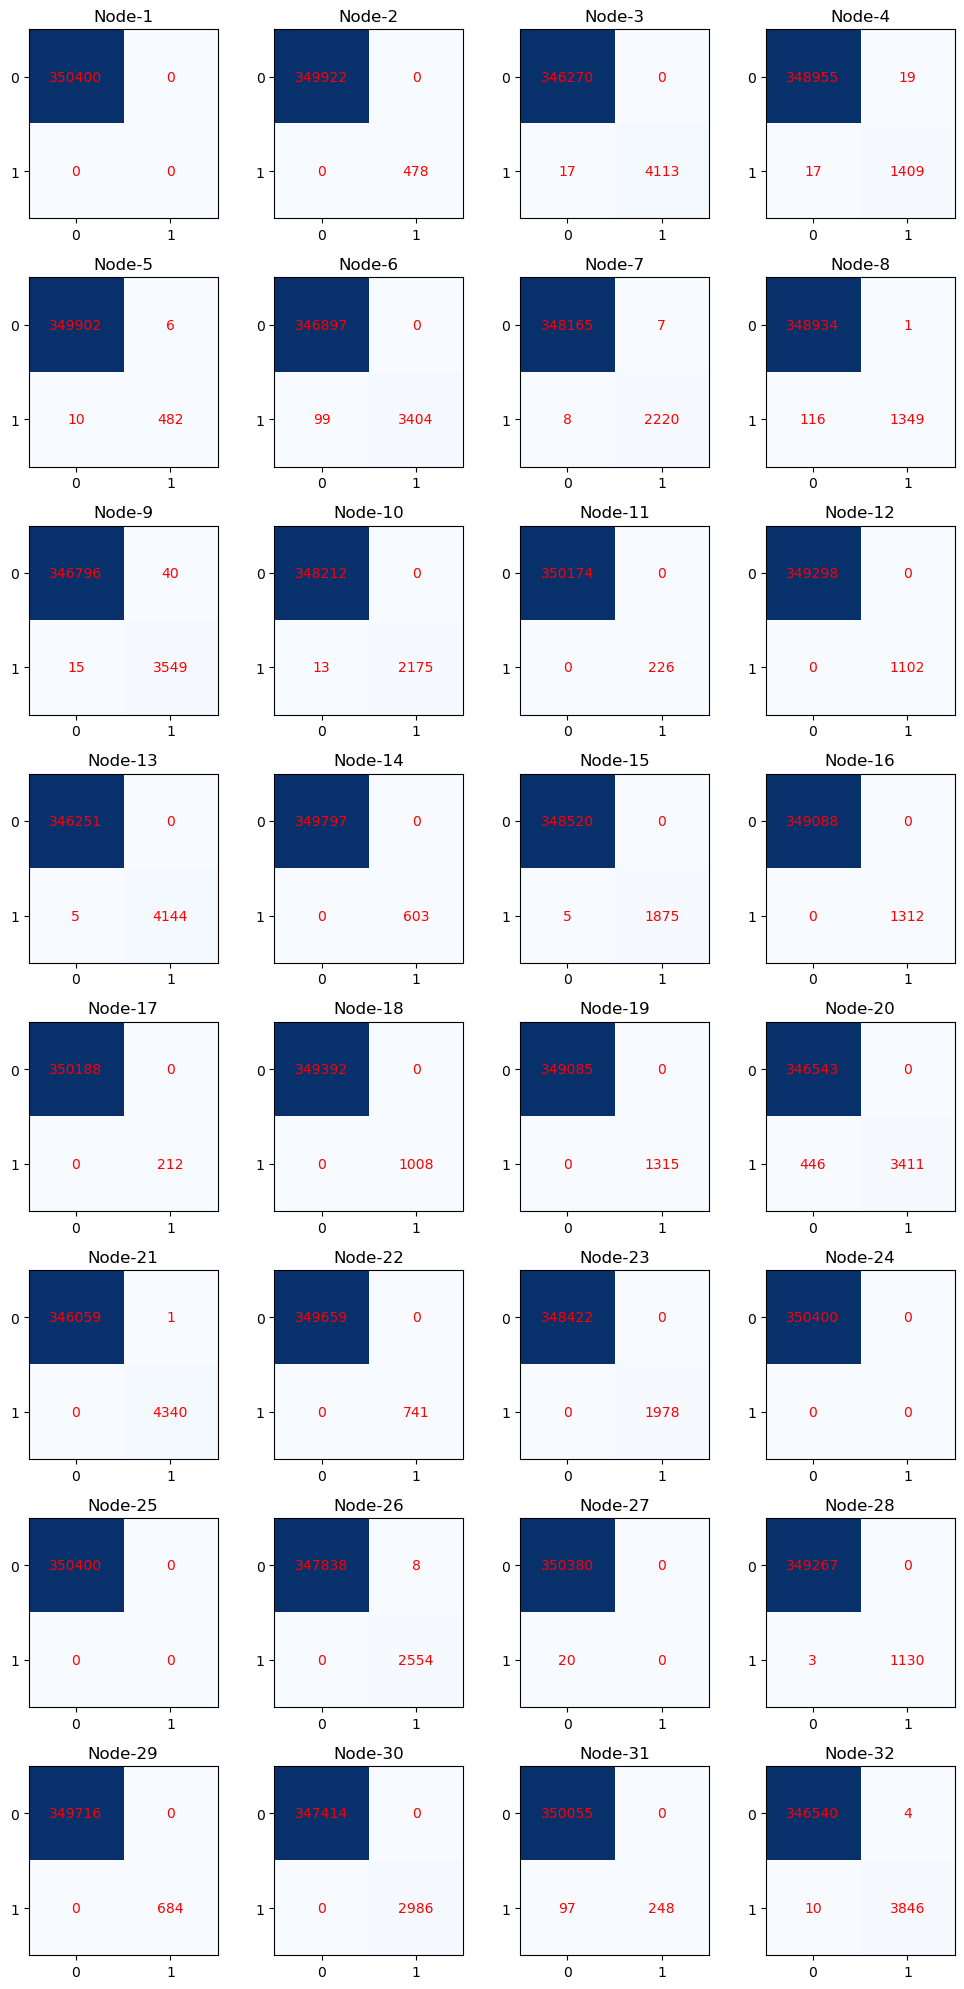

In [22]:
fig, axes = plt.subplots(8, 4, figsize=(10, 20))
for i, ax in enumerate(axes.flatten()):
    cm = mcm[i]
    ax.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
    ax.set_title(f'Node-{i+1}')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    for ii in range(2):
        for jj in range(2):
            ax.text(jj, ii, str(cm[ii, jj]), ha='center', va='center', color='red')
plt.tight_layout()
plt.show()

In [30]:
import pandas as pd
import numpy as np

# Flatten each confusion matrix and concatenate them into a single array
flat_matrices = [cm.flatten() for cm in mcm]
confusion_matrix_df = pd.DataFrame(flat_matrices, columns=['TN', 'FP', 'FN', 'TP'])

# Print the DataFrame
print("Confusion Matrix List:")
print(confusion_matrix_df)


Confusion Matrix List:
        TN  FP   FN    TP
0   350400   0    0     0
1   349922   0    0   478
2   346270   0   17  4113
3   348955  19   17  1409
4   349902   6   10   482
5   346897   0   99  3404
6   348165   7    8  2220
7   348934   1  116  1349
8   346796  40   15  3549
9   348212   0   13  2175
10  350174   0    0   226
11  349298   0    0  1102
12  346251   0    5  4144
13  349797   0    0   603
14  348520   0    5  1875
15  349088   0    0  1312
16  350188   0    0   212
17  349392   0    0  1008
18  349085   0    0  1315
19  346543   0  446  3411
20  346059   1    0  4340
21  349659   0    0   741
22  348422   0    0  1978
23  350400   0    0     0
24  350400   0    0     0
25  347838   8    0  2554
26  350380   0   20     0
27  349267   0    3  1130
28  349716   0    0   684
29  347414   0    0  2986
30  350055   0   97   248
31  346540   4   10  3846


In [19]:
# Compute detection accuracy from confusion matrices
detection_accuracy = np.sum(mcm[:, 1, 1]) / np.sum(mcm[:, 1, :])
print("Detection Accuracy:", detection_accuracy)

Detection Accuracy: 0.9836169223616922


In [34]:
import numpy as np

# Compute detection accuracy
detection_accuracy = np.sum(mcm[:, 1, 1]) / np.sum(mcm[:, 1, :])

# Compute overall accuracy
overall_accuracy = (np.sum(mcm[:, 1, 1]) + np.sum(mcm[:, 0, 0])) / np.sum(mcm)

# Compute true positive rate (sensitivity or recall)
true_positive_rate = np.sum(mcm[:, 1, 1]) / np.sum(mcm[:, 1, :])

# Compute true negative rate (specificity)
true_negative_rate = np.sum(mcm[:, 0, 0]) / np.sum(mcm[:, 0, :])

# Compute precision
precision = np.sum(mcm[:, 1, 1]) / np.sum(mcm[:, :, 1])

# Compute F1 score
f1_score = 2 * (precision * true_positive_rate) / (precision + true_positive_rate)

print("Detection Accuracy (Leak Detection):", detection_accuracy)
print("Overall Accuracy (All Classes):", overall_accuracy)
print("True Positive Rate (Sensitivity or Recall):", true_positive_rate)
print("True Negative Rate (Specificity):", true_negative_rate)
print("Precision:", precision)
print("F1 Score:", f1_score)

print("\nExplanation:")
print("Detection Accuracy focuses specifically on the model's ability to detect positive instances (leaks),\n calculating the proportion of true positive predictions (correctly detecting leaks) among all instances\n where leaks are actually present (both true positives and false negatives).")
print("Overall Accuracy computes the proportion of correctly classified samples (both positive and negative)\n among all samples in the dataset. It provides a more general measure of the model's correctness, encompassing\n its ability to correctly classify both positive and negative instances.")


Detection Accuracy (Leak Detection): 0.9836169223616922
Overall Accuracy (All Classes): 0.9999137592751142
True Positive Rate (Sensitivity or Recall): 0.9836169223616922
True Negative Rate (Specificity): 0.9999922932335038
Precision: 0.9983767459418649
F1 Score: 0.9909418762587232

Explanation:
Detection Accuracy focuses specifically on the model's ability to detect positive instances (leaks),
 calculating the proportion of true positive predictions (correctly detecting leaks) among all instances
 where leaks are actually present (both true positives and false negatives).
Overall Accuracy computes the proportion of correctly classified samples (both positive and negative)
 among all samples in the dataset. It provides a more general measure of the model's correctness, encompassing
 its ability to correctly classify both positive and negative instances.


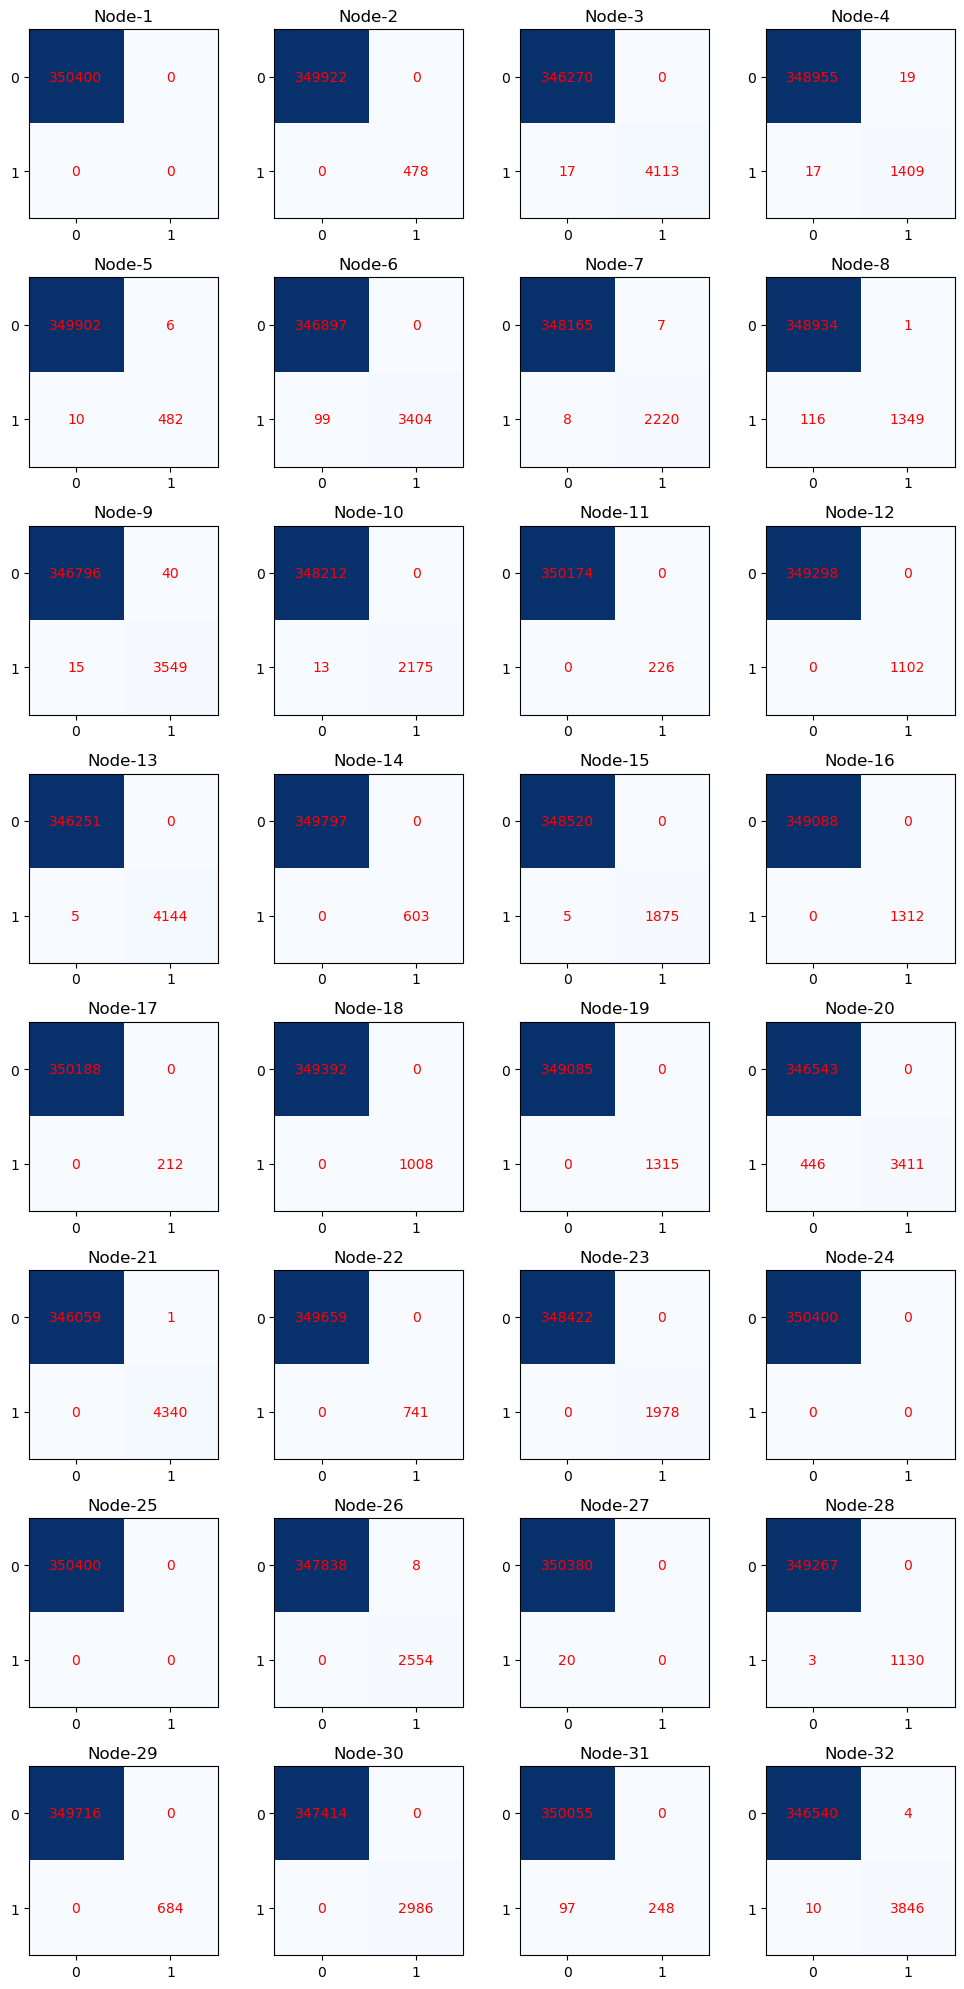

In [21]:
fig, axes = plt.subplots(8, 4, figsize=(10, 20))
for i, ax in enumerate(axes.flatten()):
    cm = mcm[i]
    ax.imshow(cm, cmap=plt.cm.Blues, interpolation='nearest')
    ax.set_title(f'Node-{i+1}')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    for ii in range(2):
        for jj in range(2):
            ax.text(jj, ii, str(cm[ii, jj]), ha='center', va='center', color='red')
plt.tight_layout()
plt.show()